Importing Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Importing Data

In [ ]:
data=pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Data Preprocessing

In [ ]:
#id column is not relevant, so remove that column

data.drop(columns=['id'],inplace=True)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [ ]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
#missing value handling

def draw_missing_data_table(data):
  total=data.isnull().sum().sort_values(ascending=False)
  percent=(data.isnull().sum()/data.isnull().count().sort_values(ascending=False))
  missing_data= pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
  return missing_data
draw_missing_data_table(data)

,Total,Percent
bmi,201,0.039335
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000
smoking_status,0,0.000000


In [ ]:
#replace missing data with mean
data=data.fillna(np.mean(data['bmi']))

In [ ]:
# Classifying data into numerical and categorical variables.
data_numerical=data[['age','avg_glucose_level','bmi']]
data_categorical=data[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type',
                       'smoking_status', 'stroke']]

Numerical Variable Analysis

<ipython-input-13-c9e65ad098a3>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data_numerical,shade=True,palette='rocket') # Distributions


Text(0.5, 1.0, 'Kde Plots for age, avg_glucose_level and bmi')

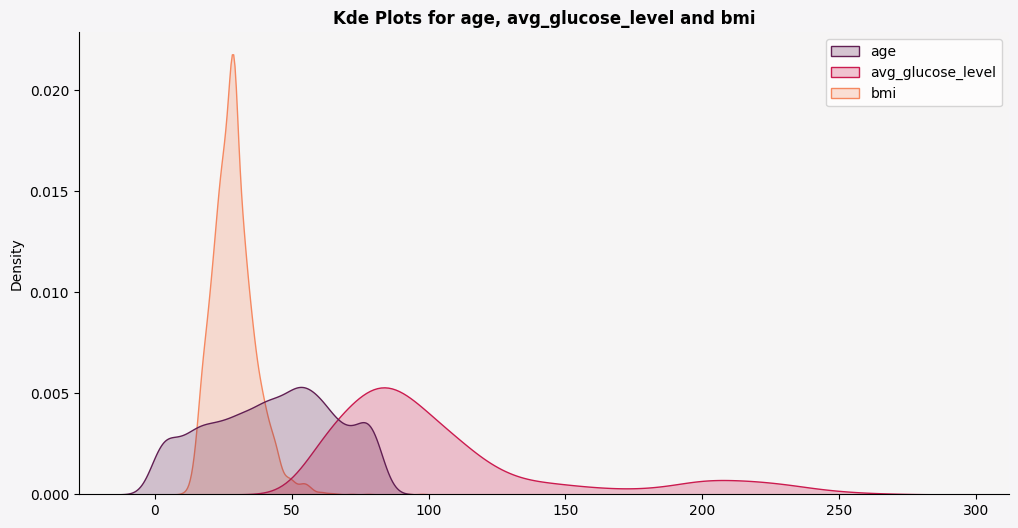

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))
fig.patch.set_facecolor('#f6f5f7')
ax.set_facecolor('#f6f5f5')
sns.kdeplot(data=data_numerical,shade=True,palette='rocket') # Distributions
# removing spines
for i in ["top","right"]:
    ax.spines[i].set_visible(False)
plt.title('Kde Plots for age, avg_glucose_level and bmi',weight='bold')

Pair Plots

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 2000x1500 with 0 Axes>

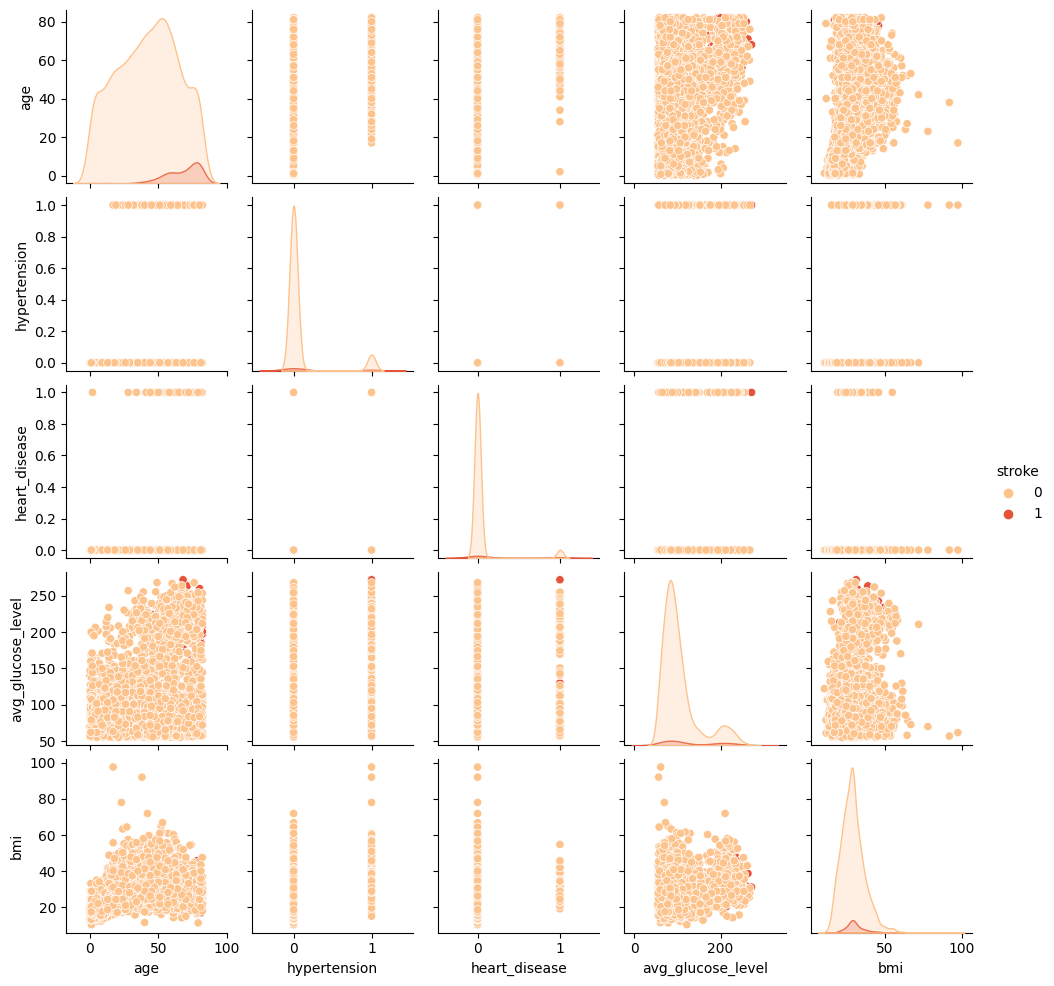

In [ ]:
#Pairplots
fig=plt.figure(figsize=(20,15),dpi=100)
sns.pairplot(data=data,hue='stroke',size=2,palette='OrRd')
plt.show()

In [ ]:
#data preprocessing
#changing string to numerical values 1 & 2
data['gender']=data['gender'].apply(lambda x : 1 if x=='Male' else 0)
data["Residence_type"] = data["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
data["ever_married"] = data["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)
# Removing the observations that have smoking type unknown.
data=data[data['smoking_status']!='Unknown']

In [ ]:
#one hot encoding for smoking_status and work type

data_dummies=data[['smoking_status','work_type']]
data_dummies=pd.get_dummies(data_dummies)
data.drop(columns=['smoking_status','work_type'],inplace=True)

In [ ]:
data_stroke=data['stroke']
data.drop(columns=['stroke'],inplace=True)
data=data.merge(data_dummies,left_index=True, right_index=True,how='left')

Splitting Data

In [ ]:
#Splitting and training data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,data_stroke,test_size=0.25,random_state=42)

In [ ]:
#standardising
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=4)
x_train, y_train = sm.fit_resample(x_train, y_train.ravel())


In [ ]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Training Models

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
def Model(model):
    model.fit(x_train,y_train)
    score = model.score(x_test, y_test)
    model_train_score = model.score(x_train, y_train)
    model_test_score = model.score(x_test, y_test)
    prediction = model.predict(x_test)
    cm = confusion_matrix(y_test,prediction)
    print('Testing Score \n',score)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=None)
    disp.plot()
    plt.show()


Testing Score 
 0.7354260089686099


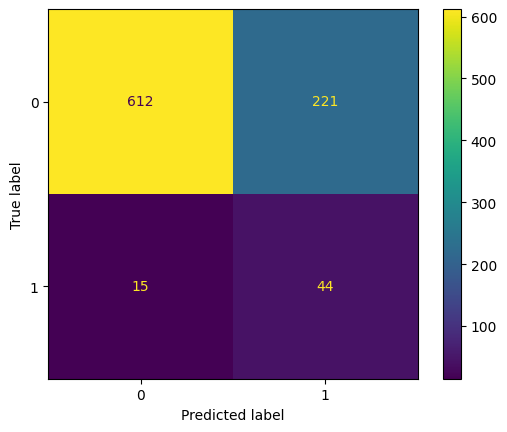

In [ ]:
# Logistic Regression
lg_reg=LogisticRegression()
Model(lg_reg)

Testing Score 
 0.844170403587444


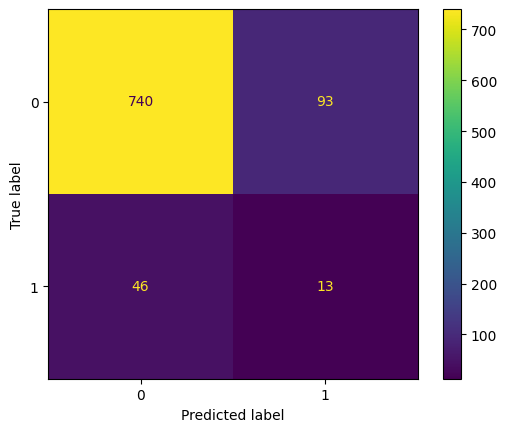

In [ ]:
# Decision Tree Classification
d_classif= DecisionTreeClassifier()
Model(d_classif)